In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [106]:
df = pd.read_csv("IRIS.csv")
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [107]:
colors = ['pink','red','blue']
species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

In [108]:
def plotter(param1, param2) :
    for i in range(3) :
        x = df[df['species'] == species[i]]
        plt.scatter(x[param1], x[param2], color = colors[i], label = species[i])
    plt.xlabel(param1)
    plt.ylabel(param2)
    plt.legend()

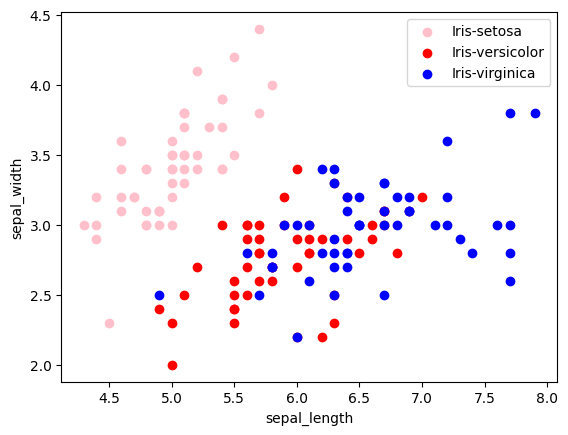

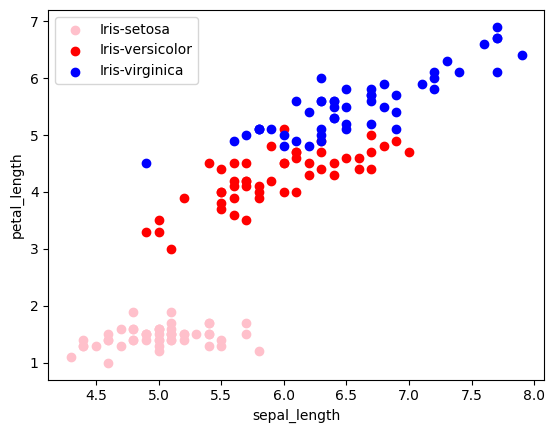

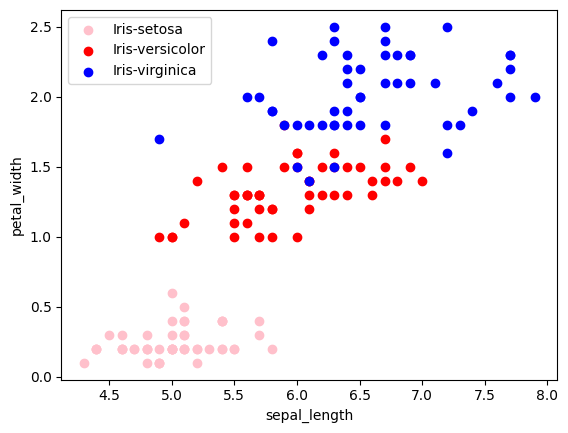

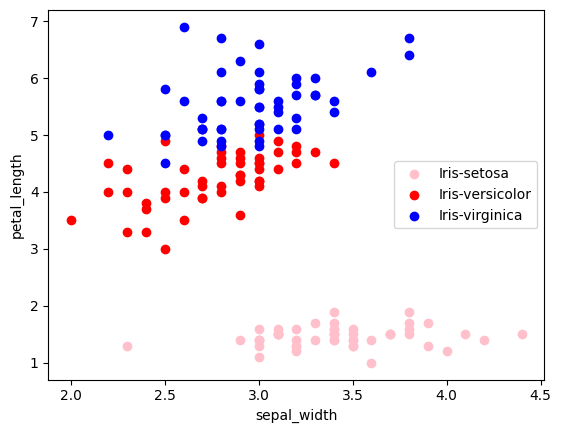

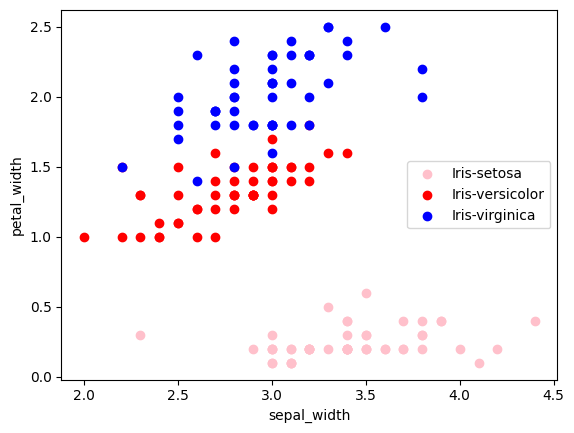

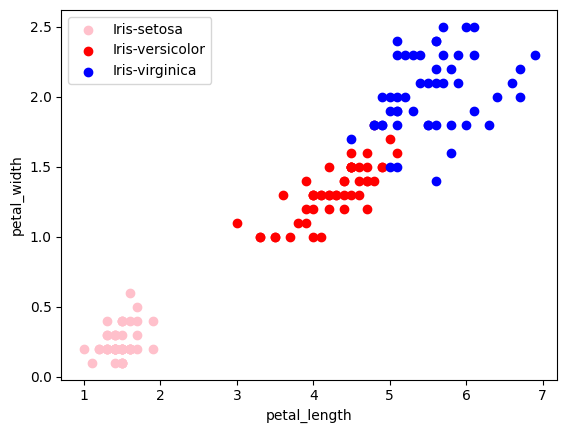

In [109]:
for i in range(3) :
    for j in range(i + 1, 4):
        plt.figure()
        plotter(df.columns[i],df.columns[j])
        plt.show()

As you can see the best indicator of species is based on petal_length and petal_width

In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [236]:
from sklearn.model_selection import train_test_split

In [306]:
def printAccuracy(cols) :
    X = df[cols]

    y = df.species

    acc_sum = 0

    for i in range(100) :
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        reg = LogisticRegression(max_iter=1000)
        reg.fit(X_train, y_train);
        acc_sum += reg.score(X_test, y_test)
    
    print("Accuracy: ", acc_sum, "%")

In [321]:
printAccuracy(['sepal_length', 'sepal_width'])

Accuracy:  80.19999999999996 %


In [322]:
printAccuracy(['petal_length', 'petal_width'])

Accuracy:  96.30000000000004 %


In [323]:
printAccuracy(['sepal_length', 'sepal_width', 'petal_width', 'petal_length'])

Accuracy:  96.50000000000006 %
